# Cause and Disruption Analysis

To gain a clearer understanding of delay situations, we aim to analyze the specific reasons behind delays, their frequency, and how they differ across various categories. This helps us identify key problem areas and supports the development of targeted solutions to improve overall performance.

In [1]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Data

In [2]:
# Import the prepated disruption data
delayinfo = pd.read_csv('delay_data_cleaned_wide.csv',sep=';', encoding = 'utf-8')
delayinfo.head()

,title,description,published,validitybegin,validityend,duration,timetostart,timetostart_days,planned,reason,reason_group,affected_lines,stations
0,Einschränkung Court - Malleray-Bévilard,Der Bahnverkehr auf der Strecke Moutier - Sonc...,2025-04-10 17:59:53+00:00,2025-04-10 19:45:00+00:00,2025-04-10 22:45:00+00:00,0 days 03:00:00,0 days 01:45:07,0,False,Barrierenstörung,Operational disruption,['R42'],{'8500104': 'Court'}
1,Einschränkung Bern - Olten,Der Bahnverkehr zwischen Bern und Olten ist ei...,2025-04-10 12:22:10+00:00,2025-04-10 14:15:00+00:00,2025-04-10 17:15:00+00:00,0 days 03:00:00,0 days 01:52:50,0,False,"Zug, der die Strecke blockiert",Operational disruption,"['ICE', 'EC', 'IC1', 'IC6', 'IC8', 'IC61', 'IC...","{'8507000': 'Bern', '8500218': 'Olten'}"
2,Unterbruch Roggwil-Wynau - Langenthal,Der Bahnverkehr auf der Strecke Olten - Bern i...,2025-04-10 09:14:40+00:00,2025-04-10 11:13:00+00:00,2025-04-10 14:13:00+00:00,0 days 03:00:00,0 days 01:58:20,0,False,"Zug, der die Strecke blockiert",Operational disruption,"['IR17', 'IR35', 'S23']","{'8508101': 'Roggwil-Wynau', '8508100': 'Lange..."
3,Einschränkung Brig - Kandersteg,Der Bahnverkehr zwischen Brig und Kandersteg i...,2025-04-10 07:58:02+00:00,2025-07-20 07:00:00+00:00,2025-07-20 23:59:00+00:00,0 days 16:59:00,100 days 23:01:58,100,True,Bauarbeiten,Construction,['RE11'],"{'8501609': 'Brig', '8507475': 'Kandersteg'}"
4,Einschränkung Brig - Kandersteg,Der Bahnverkehr zwischen Brig und Kandersteg i...,2025-04-10 07:58:01+00:00,2025-07-19 07:00:00+00:00,2025-07-19 23:59:00+00:00,0 days 16:59:00,99 days 23:01:59,99,True,Bauarbeiten,Construction,['RE11'],"{'8501609': 'Brig', '8507475': 'Kandersteg'}"


In [3]:
## Set the datatypes
delayinfo["title"] = delayinfo["title"].astype("string")
delayinfo["description"] = delayinfo["description"].astype("string")
delayinfo["published"] = pd.to_datetime(delayinfo["published"])
delayinfo["validitybegin"] = pd.to_datetime(delayinfo["validitybegin"])
delayinfo["validityend"] = pd.to_datetime(delayinfo["validityend"])
delayinfo["duration"] = pd.to_timedelta(delayinfo["duration"])
delayinfo["timetostart"] = pd.to_timedelta(delayinfo["timetostart"])
delayinfo["timetostart_days"] = delayinfo["timetostart_days"].astype('int')
delayinfo["planned"] = delayinfo["planned"].astype("boolean") 
delayinfo["reason"] = delayinfo["reason"].astype("string")
delayinfo["affected_lines"] = delayinfo["affected_lines"].astype("string") 
delayinfo["stations"] = delayinfo["stations"].astype("string")

delayinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57665 entries, 0 to 57664
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   title             57665 non-null  string             
 1   description       57665 non-null  string             
 2   published         57665 non-null  datetime64[ns, UTC]
 3   validitybegin     57665 non-null  datetime64[ns, UTC]
 4   validityend       57665 non-null  datetime64[ns, UTC]
 5   duration          57665 non-null  timedelta64[ns]    
 6   timetostart       57665 non-null  timedelta64[ns]    
 7   timetostart_days  57665 non-null  int64              
 8   planned           57665 non-null  boolean            
 9   reason            25987 non-null  string             
 10  reason_group      57665 non-null  object             
 11  affected_lines    57665 non-null  string             
 12  stations          57665 non-null  string             
dtypes

## Data Quality

### Number of Disruption Types over the years

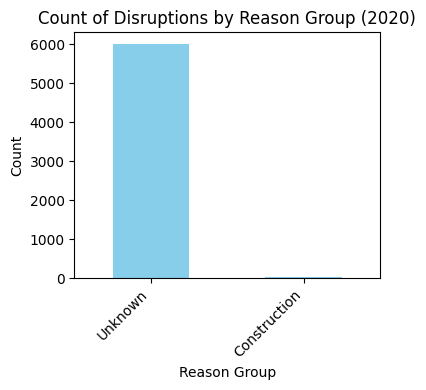

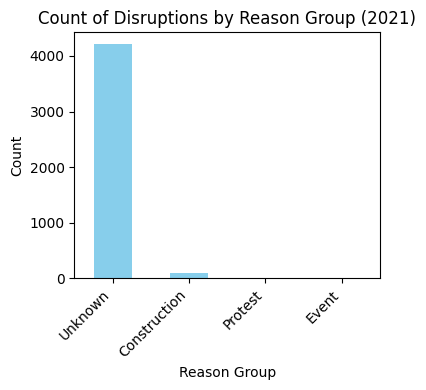

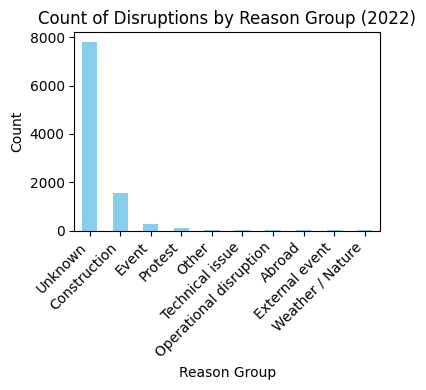

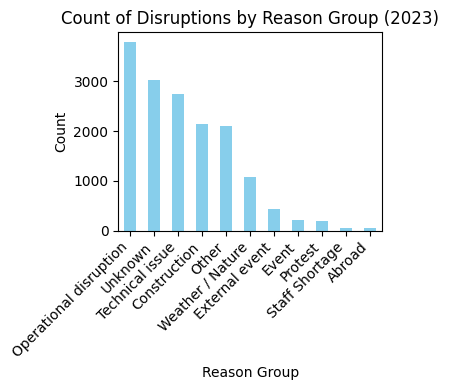

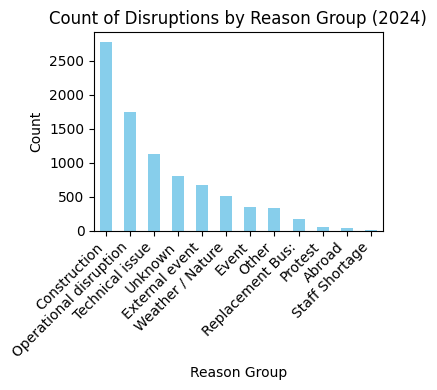

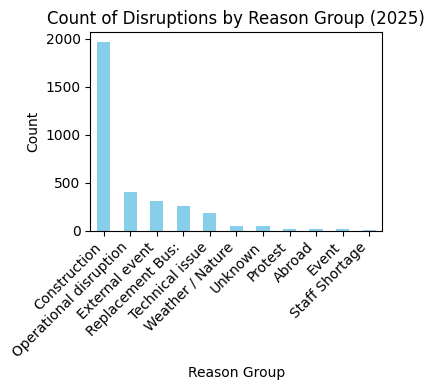

In [4]:
# Add the year to the data
delayinfo['year'] = delayinfo['validitybegin'].dt.year

# Range
years = range(2020, pd.Timestamp.today().year + 1)

# Plot for every year a box plot
for year in years:
    yearly_data = delayinfo[delayinfo['year'] == year]
    reason_counts = yearly_data['reason_group'].value_counts()

    plt.figure(figsize=(4, 4))
    reason_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Count of Disruptions by Reason Group ({year})')
    plt.xlabel('Reason Group')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Over the years, we observed a clear improvement in the quality of the data. It has become increasingly easier to extract meaningful insights from the descriptions and titles of the notifications. During our review, we also noticed that many earlier messages were written in both English and French, which added to the inconsistency.

In contrast, the data from 2024 and 2025 is much more structured. Most interruption messages during this period can be clearly categorized, with only a small number of entries lacking a specific reason. This improved consistency makes recent data more suitable for reliable analysis.

### Number of disruption notices over the years

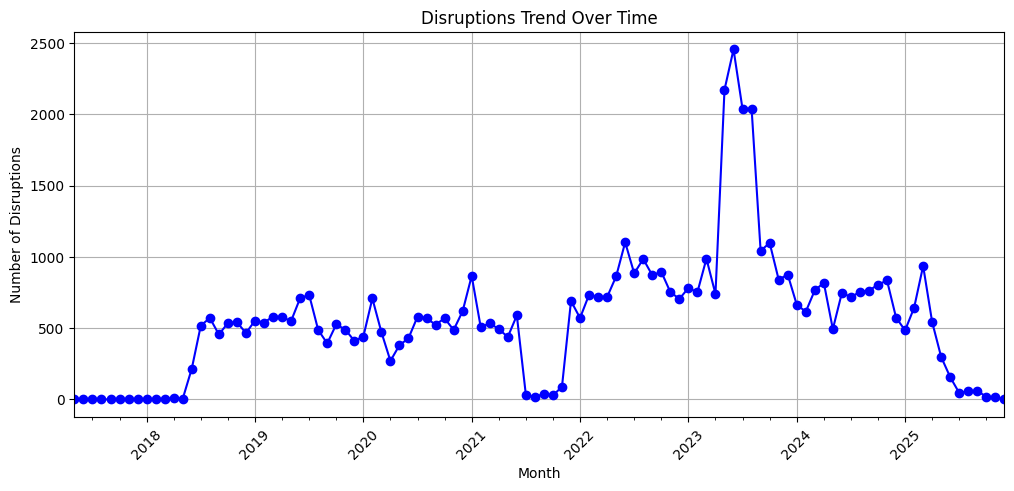

In [5]:
# Resample the data by month and count disruptions per month
monthly_disruptions = delayinfo.resample('ME', on='validitybegin').size()

# Plot the number of disruptions per month
plt.figure(figsize=(12, 5))
monthly_disruptions.plot(kind='line', color='b', marker='o')
plt.title('Disruptions Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Disruptions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

This time series shows the number of interruption messages posted per month over the past years. There are some unusual entries that only contain $(description), but these account for only 200 entries over four months. During this period, the descriptions were also longer than usual, including information from various areas. Therefore, I would suggest that there was likely a technical issue during this time. Moving forward, we will focus exclusively on the data from 2024 onwards, as this is the period we are concentrating on for our train data analysis.

Due to the difficulty in categorizing earlier data, both because of inconsistent formatting and these faulty entries, we decided to limit our analysis to the years 2024 and 2025. The data from this period is more complete, consistent, and relevant for the focus of our train interruption analysis.

In [6]:
delayinfo[delayinfo['description'].str.contains('$', na=False)]

,title,description,published,validitybegin,validityend,duration,timetostart,timetostart_days,planned,reason,reason_group,affected_lines,stations,year
0,Einschränkung Court - Malleray-Bévilard,Der Bahnverkehr auf der Strecke Moutier - Sonc...,2025-04-10 17:59:53+00:00,2025-04-10 19:45:00+00:00,2025-04-10 22:45:00+00:00,0 days 03:00:00,0 days 01:45:07,0,False,Barrierenstörung,Operational disruption,['R42'],{'8500104': 'Court'},2025
1,Einschränkung Bern - Olten,Der Bahnverkehr zwischen Bern und Olten ist ei...,2025-04-10 12:22:10+00:00,2025-04-10 14:15:00+00:00,2025-04-10 17:15:00+00:00,0 days 03:00:00,0 days 01:52:50,0,False,"Zug, der die Strecke blockiert",Operational disruption,"['ICE', 'EC', 'IC1', 'IC6', 'IC8', 'IC61', 'IC...","{'8507000': 'Bern', '8500218': 'Olten'}",2025
2,Unterbruch Roggwil-Wynau - Langenthal,Der Bahnverkehr auf der Strecke Olten - Bern i...,2025-04-10 09:14:40+00:00,2025-04-10 11:13:00+00:00,2025-04-10 14:13:00+00:00,0 days 03:00:00,0 days 01:58:20,0,False,"Zug, der die Strecke blockiert",Operational disruption,"['IR17', 'IR35', 'S23']","{'8508101': 'Roggwil-Wynau', '8508100': 'Lange...",2025
3,Einschränkung Brig - Kandersteg,Der Bahnverkehr zwischen Brig und Kandersteg i...,2025-04-10 07:58:02+00:00,2025-07-20 07:00:00+00:00,2025-07-20 23:59:00+00:00,0 days 16:59:00,100 days 23:01:58,100,True,Bauarbeiten,Construction,['RE11'],"{'8501609': 'Brig', '8507475': 'Kandersteg'}",2025
4,Einschränkung Brig - Kandersteg,Der Bahnverkehr zwischen Brig und Kandersteg i...,2025-04-10 07:58:01+00:00,2025-07-19 07:00:00+00:00,2025-07-19 23:59:00+00:00,0 days 16:59:00,99 days 23:01:59,99,True,Bauarbeiten,Construction,['RE11'],"{'8501609': 'Brig', '8507475': 'Kandersteg'}",2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57660,"Construction work: Between Baden and Waldshut,...",25.03.2018 21:45 - 09.08.2018 23:25Between Bad...,2018-02-20 16:49:13+00:00,2018-03-25 23:45:00+00:00,2018-08-10 01:25:00+00:00,137 days 01:40:00,33 days 06:55:47,33,True,<NA>,Unknown,[],{'8503504': 'Baden'},2018
57661,"Construction work: In Uster station, engineeri...",18.03.2018 21:45 - 24.11.2018 05:15In Uster st...,2018-02-20 16:24:10+00:00,2018-03-18 22:45:00+00:00,2018-11-24 06:15:00+00:00,250 days 07:30:00,26 days 06:20:50,26,True,<NA>,Unknown,[],{'8503125': 'Uster'},2018
57662,Construction work: Between Pratteln and Brugg ...,11.03.2018 20:45 - 02.11.2018 04:45Between Pra...,2018-01-11 12:22:38+00:00,2018-03-11 21:45:00+00:00,2018-11-02 05:45:00+00:00,235 days 08:00:00,59 days 09:22:22,59,True,<NA>,Unknown,[],"{'8500309': 'Brugg AG', '8500021': 'Pratteln'}",2018
57663,Construction work: KÃ¼snacht ZH - Meilen,10.01.2018 21:40 - 05.10.2018 05:00Between KÃ¼...,2017-12-07 10:50:35+00:00,2018-01-10 22:40:00+00:00,2018-10-05 07:00:00+00:00,267 days 08:20:00,34 days 11:49:25,34,True,<NA>,Unknown,[],{'8503104': 'Meilen'},2018


In [7]:
## Select the data > 1.1.2024
delayinfo = delayinfo[delayinfo['validitybegin'] >= '2024-01-01']

### Min and Max Values

In [8]:
# Get min and max values for each column
min_max_values = delayinfo[['published', 'validitybegin', 'validityend', 'duration', 'timetostart', 'timetostart_days']].agg(['min', 'max'])

print(min_max_values)

                    published             validitybegin  \
min 2023-09-25 05:44:54+00:00 2024-01-01 00:00:00+00:00   
max 2025-04-10 17:59:53+00:00 2025-12-06 22:30:00+00:00   

                  validityend          duration         timetostart  \
min 2024-01-01 04:51:00+00:00   0 days 00:00:00 -207 days +16:27:52   
max 2025-12-13 23:59:00+00:00 649 days 23:59:00   390 days 13:04:02   

     timetostart_days  
min              -207  
max               390  


In [9]:
delayinfo[delayinfo['timetostart_days'] <= -10]

,title,description,published,validitybegin,validityend,duration,timetostart,timetostart_days,planned,reason,reason_group,affected_lines,stations,year
476,Nicht barrierefreier Zugang Wädenswil Bahnhof,Der Zugang zum Bahnhof Wädenswil ist nicht bar...,2025-03-24 10:28:45+00:00,2025-03-11 00:00:00+00:00,2025-05-28 17:00:00+00:00,78 days 17:00:00,-14 days +13:31:15,-14,False,<NA>,Unknown,[],"{'8503206': 'Wädenswil', '8502204': 'Zug'}",2025
597,Unterbruch Schopfheim - Zell (Wiesental),Der Bahnverkehr zwischen Schopfheim und Zell (...,2025-03-19 05:53:03+00:00,2025-03-06 00:00:00+00:00,2025-03-28 02:00:00+00:00,22 days 02:00:00,-14 days +18:06:57,-14,False,ausserordentliche Bauarbeiten,Construction,[],{},2025
642,Unterbruch Schopfheim - Zell (Wiesental),Der Bahnverkehr zwischen Schopfheim und Zell (...,2025-03-17 07:33:27+00:00,2025-03-06 00:00:00+00:00,2025-03-31 23:59:00+00:00,25 days 23:59:00,-12 days +16:26:33,-12,False,ausserordentliche Bauarbeiten,Construction,[],{},2025
688,Unregelmässiger Betrieb Linie R11,Unregelmässiger Betrieb Linie R11 (Bahn).Der G...,2025-03-12 21:58:55+00:00,2025-02-17 04:00:00+00:00,2025-03-31 01:00:00+00:00,41 days 21:00:00,-24 days +06:01:05,-24,False,unbekannt,Unknown,['R11'],{},2025
984,Bitte achten Sie in Bollement beim Zug besonde...,Bitte achten Sie in Bollement beim Zug besonde...,2025-02-28 08:04:40+00:00,2025-02-05 08:03:00+00:00,2025-12-13 23:59:00+00:00,311 days 15:56:00,-24 days +23:58:20,-24,False,<NA>,Unknown,[],"{'8500196': 'Bollement', '8502204': 'Zug', '85...",2025
1249,Bitte achten Sie in Bollement beim Zug besonde...,Bitte achten Sie in Bollement beim Zug besonde...,2025-02-17 14:33:02+00:00,2025-02-05 08:03:00+00:00,2025-12-13 23:59:00+00:00,311 days 15:56:00,-13 days +17:29:58,-13,False,<NA>,Unknown,[],"{'8500196': 'Bollement', '8502204': 'Zug', '85...",2025
1410,Einschränkung Oron - Palézieux,Der Bahnverkehr auf der Strecke Fribourg/Freib...,2025-02-10 12:52:27+00:00,2025-01-13 00:05:00+00:00,2025-06-15 05:05:00+00:00,153 days 05:00:00,-29 days +11:12:33,-29,False,Bauarbeiten,Construction,[],{'8504020': 'Oron'},2025
1507,Einschränkung Innsbruck Hbf - Salzburg Hbf,Der Bahnverkehr auf der Strecke Zürich HB - Wi...,2025-02-06 09:42:06+00:00,2024-12-15 00:00:00+00:00,2025-03-08 05:00:00+00:00,83 days 05:00:00,-54 days +14:17:54,-54,False,Bauarbeiten,Construction,[],{'8504483': 'Ins'},2024
1793,Einschränkung Bahnhof Jenaz,Der Bahnverkehr im Bahnhof Jenaz ist eingeschr...,2025-01-30 02:30:44+00:00,2024-12-15 16:02:00+00:00,2025-12-13 23:59:00+00:00,363 days 07:57:00,-46 days +13:31:16,-46,False,Bauarbeiten,Construction,['RE24'],"{'8509062': 'Jenaz', '8504483': 'Ins'}",2024
2009,Einschränkung Aigle - Le Sépey,Einschränkung zwischen Aigle und Le Sépey (Bah...,2025-01-16 12:38:57+00:00,2025-01-07 10:10:00+00:00,2025-01-18 00:00:00+00:00,10 days 13:50:00,-10 days +21:31:03,-10,False,Naturereignis,Weather / Nature,['R71'],{'8501400': 'Aigle'},2025


These must have been published with a validity begin date far in the past. It looks like this information was maybe reposted. We are going to keep them, as their validity end date is still relevant.

# Data Analysis

## Disruption Duration by Reason

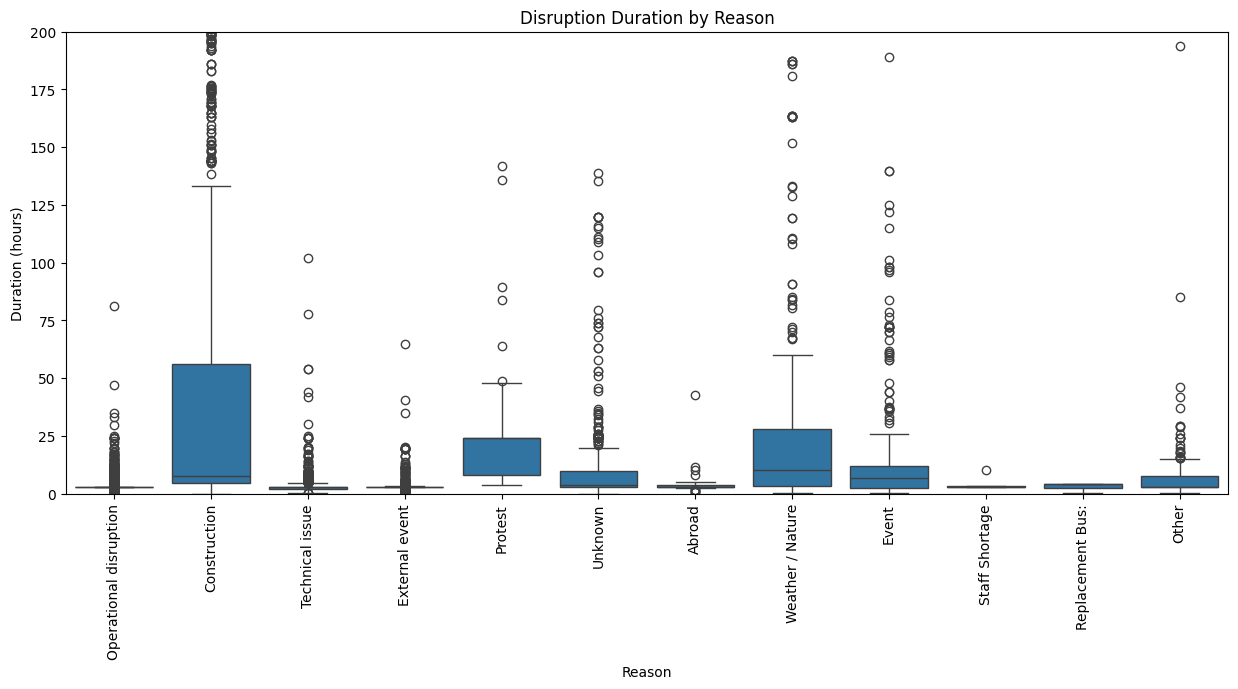

In [10]:
# Create a boxplot to show disruption duration by reason
plt.figure(figsize=(15, 6))

# Add Duration in hours
delayinfo['duration_hours'] = delayinfo['duration'].dt.total_seconds() / 3600

# Create the plot
sns.boxplot(x='reason_group', y='duration_hours', data=delayinfo)

# Add title and labels
plt.title('Disruption Duration by Reason')
plt.xlabel('Reason')
plt.ylabel('Duration (hours)')


# Set y-axis limit from 0 to 10
plt.ylim(0,200)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

We observe that weather and natural incidents, as well as construction, tend to have the longest duration. This is reasonable, as construction projects typically last a few days or even weeks. However, the data is very right-skewed, with most construction work being completed after just a few hours, while a few very long cases increase the average.

Protests and events have an average duration of around 24 hours, which makes sense since strikes generally last one day, and events like city runs or festivals typically span one or two days.

For the remaining categories, technical issues and operational disruptions have a lower mean duration, which is logical as they are typically resolved quickly.

## Planned Vs Unplanned Disruptions

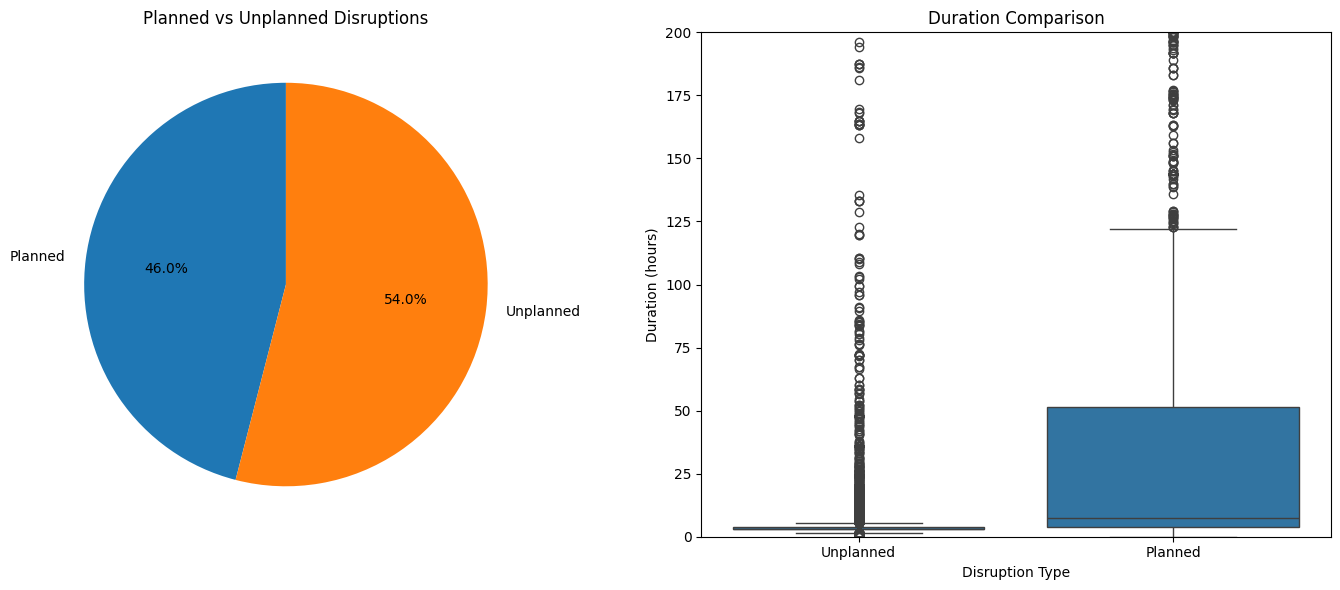

Data Summary:
              count                       mean                         std  \
planned_label                                                                
Planned        5429  5 days 16:45:51.357524405  23 days 20:46:32.399257760   
Unplanned      6377  3 days 00:01:57.469029324  25 days 00:29:36.113618086   

                           min              25%              50%  \
planned_label                                                      
Planned        0 days 00:00:00  0 days 04:00:00  0 days 07:15:00   
Unplanned      0 days 00:05:00  0 days 03:00:00  0 days 03:00:00   

                           75%                max  
planned_label                                      
Planned        2 days 03:30:00  411 days 17:59:00  
Unplanned      0 days 04:00:00  649 days 23:59:00  


In [11]:
# Create a new column for labeling
delayinfo['planned_label'] = delayinfo['planned'].map({True: 'Planned', False: 'Unplanned'})

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
sizes = [
    len(delayinfo[delayinfo['planned'] == True]),
    len(delayinfo[delayinfo['planned'] == False])
]
labels = ['Planned', 'Unplanned']
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Planned vs Unplanned Disruptions')

# Boxplot
sns.boxplot(x='planned_label', y='duration_hours', data=delayinfo, ax=axes[1])
axes[1].set_title('Duration Comparison')
axes[1].set_xlabel('Disruption Type')
axes[1].set_ylabel('Duration (hours)')
axes[1].set_ylim(0,200)

plt.tight_layout()
plt.show()

# Summary
print("Data Summary:")
print(delayinfo.groupby('planned_label')['duration'].describe())

The average duration of planned disruptions is approximately 5 days, 16 hours, and 45 minutes, though the data shows considerable variability. The standard deviation of about 24 days indicates that while many planned disruptions are resolved relatively quickly, others can span much longer periods. This wide range suggests that some planned disruptions might involve long-term projects or maintenance work. In terms of distribution, 25% of planned disruptions lasted less than 4 hours, 50% lasted less than 7 hours and 15 minutes, and 75% lasted less than 2 days.

In contrast, unplanned disruptions are slightly more frequent. The average duration for these disruptions is about 3 days, with a standard deviation of 25 days, indicating high variability. While most unplanned disruptions are resolved quickly, some can extend over a much longer period. For unplanned disruptions, 25% lasted less than 3 hours, 50% lasted less than 3 hours, and 75% lasted less than 4 hours.